### Remove scroll from figures

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Extend the size of the Window

In [3]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## Load Modules

In [14]:
import netCDF4 as nc
import glob
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

## Read Sunspot Data and create a multi-index pandas dataframe on year and month

In [6]:
# Define path
histDataPath = '../../inputs_to_models/sunspot_number/SN_m_tot_V2.0.csv'

# Read SN monthly average file with custom column names
colnames=['Year', 'Month', 'FracYear', 'SN', 'SNsd', 'NObs', 'prov'] 
SN = pd.read_csv(histDataPath, delimiter=';', names=colnames)
SN = SN.set_index(['Year', 'Month'])

SN


FracYear     SN  SNsd  NObs  prov
Year Month                                   
1749 1      1749.042   96.7  -1.0    -1     1
     2      1749.123  104.3  -1.0    -1     1
     3      1749.204  116.7  -1.0    -1     1
     4      1749.288   92.8  -1.0    -1     1
     5      1749.371  141.7  -1.0    -1     1
...              ...    ...   ...   ...   ...
2022 1      2022.042   54.0  12.9  1007     0
     2      2022.122   59.7  13.1  1044     0
     3      2022.204   78.5  13.9  1277     0
     4      2022.286   84.1  15.2  1237     0
     5      2022.371   96.5  16.0  1250     0

[3281 rows x 5 columns]

## Read CMIP Data

In [7]:
# Define paths
histDataPath = '../../data/CMIP/hist-sol/'
solDataPath = '../../data/CMIP/hist-sol/'

In [8]:
# Find files
histFiles = glob.glob(histDataPath + '*.nc')
solFiles = glob.glob(solDataPath + '*.nc')

### Create variables for hist-sol run

In [9]:
# Define variables
solLat = None
solLon = None
solTime = None
solTas = None

# Read data and concatenate arrays
for file in solFiles:
    ds = nc.Dataset(file)

    if solLat is None:
        solLat = ds['lat'][:]
    
    if solLon is None:
        solLon = ds['lon'][:]

    if solTime is None:
        solTime = ds['time'][:]
    else:
        solTime = np.concatenate((solTime, ds['time'][:]))

    if solTas is None:
        solTas = ds['tas'][:]
    else:
        solTas = np.concatenate((solTas, ds['tas'][:]))        


### Create variables for hist run

In [10]:
# Define variables
histLat = None
histLon = None
histTime = None
histTas = None

# Read data and concatenate arrays
for file in histFiles:
    ds = nc.Dataset(file)

    if histLat is None:
        histLat = ds['lat'][:]
    
    if histLon is None:
        histLon = ds['lon'][:]

    if histTime is None:
        histTime = ds['time'][:]
    else:
        histTime = np.concatenate((histTime, ds['time'][:]))

    if histTas is None:
        histTas = ds['tas'][:]
    else:
        histTas = np.concatenate((histTas, ds['tas'][:]))        


### Create datetime variables

In [11]:
# Reference date
refDate = pd.to_datetime('1850-01-01')
solDate = np.array([refDate + pd.Timedelta(day, "d") for day in solTime])
histDate = np.array([refDate + pd.Timedelta(day, "d") for day in histTime])

### Create pandas dataframe using time, latitude, and longitude as multi-index

In [13]:
solMGdate, solMGlat, solMGlon = np.meshgrid(solDate, histLat, histLon)

ValueError: cannot reshape array of size 6065280 into shape (1,144)

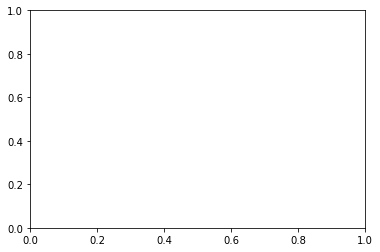

In [15]:
plt.pcolor(solMGlat, solMGlon, solTas[0,:,:])